In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import urllib  # the lib that handles the url stuff
import io
import requests
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_171223.txt'
f=requests.get(url).content
df=pd.read_csv(io.StringIO(f.decode('utf-8')))

In [3]:
# import os
# import glob

# directory = os.getcwd()+'/data'
# files = glob.glob(os.path.join(directory, "turnstile*.txt"))
# #print("Current working dir : %s" % path)
# df = pd.concat(map(pd.read_csv, glob.glob(os.path.join(directory, "turnstile*.txt"))))
# df.head()

In [4]:
len(df)

199474

In [5]:
df = df.drop(['LINENAME','DIVISION'],axis=1)
df = df[df.DESC=='REGULAR'].drop('DESC',axis=1)
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,12/16/2017,03:00:00,6446400,2181796
1,A002,R051,02-00-00,59 ST,12/16/2017,07:00:00,6446408,2181807
2,A002,R051,02-00-00,59 ST,12/16/2017,11:00:00,6446457,2181889
3,A002,R051,02-00-00,59 ST,12/16/2017,15:00:00,6446670,2181964
4,A002,R051,02-00-00,59 ST,12/16/2017,19:00:00,6446975,2182026


In [6]:
test = df[(df.STATION=='WORLD TRADE CTR') & (df.DATE=='12/19/2017')]

In [8]:
test.loc[57348:57352]

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
57348,N094,R029,01-03-00,WORLD TRADE CTR,12/19/2017,07:00:00,11299,8635
57349,N094,R029,01-03-00,WORLD TRADE CTR,12/19/2017,11:00:00,11525,9285
57350,N094,R029,01-03-00,WORLD TRADE CTR,12/19/2017,18:00:00,8,12
57351,N094,R029,01-03-00,WORLD TRADE CTR,12/19/2017,23:00:00,1727832,333155


In [192]:
byTurnstile = df.groupby(['STATION','DATE','C/A','UNIT','SCP'])

In [207]:
def CleanTurnstileReset(x):
    return(x.diff()[(x.diff()>=0) & (x.diff()<=50000)].sum())

In [208]:
#byStation = byTurnstile.agg(lambda x: x.max()-x.min())
byStation = byTurnstile.agg(CleanTurnstileReset)

In [209]:
byStation = byStation.groupby(['STATION','DATE']).sum()
type(byStation)

pandas.core.frame.DataFrame

In [210]:
# test = df[(df.STATION=='RECTOR ST') & (df.DATE=='01/06/2018')]
# test['FLAG'] = False
# for i in range(1,len(test)):
#     if test.iloc[i].ENTRIES < test.iloc[i-1].ENTRIES:
#         if test.iloc[i].SCP == test.iloc[i-1].SCP:
#             test.iloc[i-3:i+3].FLAG = True
# test[test.FLAG==True]

In [211]:
byStation.to_csv('test_output.csv')

In [212]:
df = pd.read_csv('test_output.csv')
df['weekday'] = pd.to_datetime(df['DATE']).dt.weekday_name
df.set_index(['STATION','DATE']).head(20)

ENTRIES  \
STATION       DATE                  
1 AV          12/16/2017    16283   
              12/17/2017    12276   
              12/18/2017    20505   
              12/19/2017    21151   
              12/20/2017    21023   
              12/21/2017    20430   
              12/22/2017    18959   
103 ST        12/16/2017    12563   
              12/17/2017     9676   
              12/18/2017    28948   
              12/19/2017    29834   
              12/20/2017    30063   
              12/21/2017    28640   
              12/22/2017    27133   
103 ST-CORONA 12/16/2017    14326   
              12/17/2017    11134   
              12/18/2017    18962   
              12/19/2017    18756   
              12/20/2017    19590   
              12/21/2017    19697   

                          EXITS                                                                 \
STATION       DATE                                                                               
1 AV          12/16/2017                                              19039                      
              12/17/2017                                              14253                      
              12/18/2017                                              22089                      
              12/19/2017                                              22690                      
              12/20/2017                                              23166                      
              12/21/2017                                              22863                      
              12/22/2017                                              21621                      
103 ST        12/16/2017                                              10931                      
              12/17/2017                                               8897                      
              12/18/2017                                              17958                      
              12/19/2017                                              18279                      
              12/20/2017                                              18181                      
              12/21/2017                                              17491                      
              12/22/2017                                              16341                      
103 ST-CORONA 12/16/2017                                               9866                      
              12/17/2017                                               8318                      
              12/18/2017                                              13062                      
              12/19/2017                                              13088                      
              12/20/2017                                              13424                      
              12/21/2017                                              12884                      

                            weekday  
STATION       DATE                   
1 AV          12/16/2017   Saturday  
              12/17/2017     Sunday  
              12/18/2017     Monday  
              12/19/2017    Tuesday  
              12/20/2017  Wednesday  
              12/21/2017   Thursday  
              12/22/2017     Friday  
103 ST        12/16/2017   Saturday  
              12/17/2017     Sunday  
              12/18/2017     Monday  
              12/19/2017    Tuesday  
              12/20/2017  Wednesday  
              12/21/2017   Thursday  
              12/22/2017     Friday  
103 ST-CORONA 12/16/2017   Saturday  
              12/17/2017     Sunday  
              12/18/2017     Monday  
              12/19/2017    Tuesday  
              12/20/2017  Wednesday  
              12/21/2017   Thursday

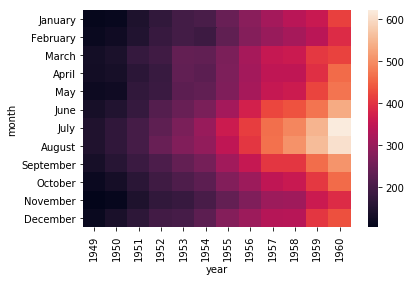

In [213]:
import seaborn as sns
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

In [141]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


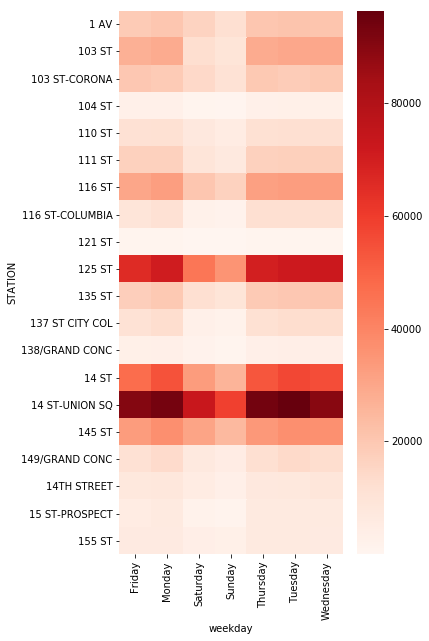

In [214]:
df = pd.read_csv('test_output.csv')
df['weekday'] = pd.to_datetime(df['DATE']).dt.weekday_name
byWeek = df.iloc[:140].pivot('STATION','weekday','ENTRIES')
plt.figure(figsize=[5,10])
sns.heatmap(byWeek, cmap='Reds')

In [215]:
len(df)

2609

In [216]:
df.head()

,STATION,DATE,ENTRIES,EXITS,weekday
0,1 AV,12/16/2017,16283,19039,Saturday
1,1 AV,12/17/2017,12276,14253,Sunday
2,1 AV,12/18/2017,20505,22089,Monday
3,1 AV,12/19/2017,21151,22690,Tuesday
4,1 AV,12/20/2017,21023,23166,Wednesday


In [217]:
byStation.loc['WORLD TRADE CTR']

,ENTRIES,EXITS
DATE,,
12/16/2017,12590,8212
12/17/2017,8808,6090
12/18/2017,16583,11360
12/19/2017,16758,9774
12/20/2017,16492,9829
12/21/2017,17067,11368
12/22/2017,14550,10658
